## 1. Introduccion del caso

El conjunto de datos utilizado en este estudio fue obtenido del portal de Datos Abiertos del Estado Peruano, específicamente del dataset titulado “Exámenes de Laboratorio de Consulta Externa de Pacientes Diagnosticados con Patologías Relacionadas a Enfermedad Renal”, disponible en el siguiente enlace: https://datosabiertos.gob.pe/dataset/ex%C3%A1menes-de-laboratorio-de-consulta-externa-de-pacientes-diagnosticados-con-patolog%C3%ADas-11.

Este dataset es proporcionado por el Seguro Social de Salud – EsSalud y contiene información anonimizada sobre pacientes atendidos en consulta externa, diagnosticados con enfermedades renales. Incluye resultados de exámenes de laboratorio como hemoglobina, hematocrito, creatinina, entre otros, así como variables complementarias como edad, sexo, fecha de atención, y ubicación geográfica (departamento, provincia y distrito).

Con el fin de garantizar la disponibilidad y facilitar su uso programático, se descargó el archivo en formato CSV y se alojó en un repositorio público en GitHub, desde el cual puede accederse directamente a la versión raw mediante el siguiente enlace: https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_5.csv

## 2. Análisis exploratorio de datos

### 2.1. Importación de librerias necesarias

In [1]:
#Para esta actividad se instalarán las siguientes librerías:
%pip install pandas matplotlib numpy seaborn scikit-learn xgboost -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Para esta actividad se importaran las siguientes librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

# 2.2 Carga del dataset

In [3]:
# Define the list of dataset URLs
datasets = [
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_1.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_2.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_3.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_4.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_5.csv"
]

# Initialize an empty list to store individual dataframes
dataframes = []

# Loop through each dataset URL and load into dataframes list
for url in datasets:
    try:
        df = pd.read_csv(url)
        dataframes.append(df)
        print(f"Successfully loaded dataset from {url}")
    except Exception as e:
        print(f"Error loading {url}: {e}")


Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_1.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_2.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_3.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_4.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_5.csv


In [4]:
# Merge all dataframes into a single dataframe
anemia_df = pd.concat(dataframes, axis=0, ignore_index=True)

# Display basic information about the merged dataframe
print(f"\nMerged dataframe has {anemia_df.shape[0]} rows and {anemia_df.shape[1]} columns")

# Display the first few rows of the merged dataframe
anemia_df.head()


Merged dataframe has 115349 rows and 30 columns


,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,RED,IPRESS,ID_PACIENTE,EDAD_PACIENTE,SEXO_PACIENTE,...,RESULTADO_1,UNIDADES_1,FEC_RESULTADO_2,PROCEDIMIENTO_2,RESULTADO_2,UNIDADES_2,HEMOGLOBINA,MCH,MCHC,MCV
0,20240531,CALLAO,CALLAO,BELLAVISTA,70102,RED ASISTENCIAL SABOGAL,H.N. ALBERTO SABOGAL SOLOGUREN,eJwzNDU3NzI2NDGwNLUwtrQwNwMAH1gDhg==,80,MASCULINO,...,94.00,mg/dL,20200102,DOSAJE DE CREATININA EN SANGRE,1.18,mg/dL,"12,2","24,8","30,8","97,7"
1,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMTQ2NjIzNzU3tTA2MgQAHsIDcA==,70,FEMENINO,...,0.61,mg/dL,20200107,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",140.0,mg/dL,"15,9","22,5",29,91
2,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMDYwMjYytzAxNzUyMQQAHl0DZw==,61,MASCULINO,...,1.16,mg/dL,20200108,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",105.0,mg/dL,"11,3","19,1","27,2","77,7"
3,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNLG0MDYzMzEzMDE1sjAxMAAAH4gDdw==,91,MASCULINO,...,1.54,mg/dL,20200108,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",94.0,mg/dL,"14,9","18,3","30,1","75,6"
4,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMDY2MjAxNrK0NDY3MwEAHmEDbg==,52,MASCULINO,...,9.97,mg/dL,20200125,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",101.0,mg/dL,"9,8","17,3","30,5","91,1"


## 2.3 Caracterizacion del Dataset

Antes de empezar a trabajar con un dataset para la creación de modelos de machine learning es necesario analizar algunas de sus caracteristicas, por ejemplo:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

El análisis puede realizarse mediante tablas o en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

In [5]:
#Revisión de tipo de datos de las variables de entrada y objetivo
df.info()
print()

#Evaluando dimensión del dataset (numero de filas y columnas) con la funcion shape
print("El dataset tiene", df.shape[0], "instancias y", df.shape[1], "columnas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15349 entries, 0 to 15348
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA_CORTE             15349 non-null  int64  
 1   DEPARTAMENTO            15349 non-null  object 
 2   PROVINCIA               15349 non-null  object 
 3   DISTRITO                15349 non-null  object 
 4   UBIGEO                  15349 non-null  int64  
 5   RED                     15349 non-null  object 
 6   IPRESS                  15349 non-null  object 
 7   ID_PACIENTE             15349 non-null  object 
 8   EDAD_PACIENTE           15349 non-null  int64  
 9   SEXO_PACIENTE           15349 non-null  object 
 10  EDAD_MEDICO             15349 non-null  int64  
 11  ID_MEDICO               15349 non-null  object 
 12  COD_DIAG                15349 non-null  object 
 13  DIAGNOSTICO             15349 non-null  object 
 14  AREA_HOSPITALARIA       15349 non-null

In [6]:
#Análisis de campos nulos
conteo_null = anemia_df.isnull().sum()
print("Numero de valores nulos por columna: ")
print(conteo_null)

Numero de valores nulos por columna: 
FECHA_CORTE               0
DEPARTAMENTO              0
PROVINCIA                 0
DISTRITO                  0
UBIGEO                    0
RED                       0
IPRESS                    0
ID_PACIENTE               0
EDAD_PACIENTE             0
SEXO_PACIENTE             0
EDAD_MEDICO               0
ID_MEDICO                 0
COD_DIAG                  0
DIAGNOSTICO               0
AREA_HOSPITALARIA         0
SERVICIO_HOSPITALARIO     0
ACTIVIDAD_HOSPITALARIA    0
FECHA_MUESTRA             0
FEC_RESULTADO_1           0
PROCEDIMIENTO_1           0
RESULTADO_1               0
UNIDADES_1                0
FEC_RESULTADO_2           0
PROCEDIMIENTO_2           0
RESULTADO_2               0
UNIDADES_2                0
HEMOGLOBINA               0
MCH                       0
MCHC                      0
MCV                       0
dtype: int64


In [7]:
# Para este ejercicio, es necesario que HEMOGLOBINA, MCH, MCHC y MCV sean de tipo float.
anemia_df['HEMOGLOBINA'] = anemia_df['HEMOGLOBINA'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCH'] = anemia_df['MCH'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCHC'] = anemia_df['MCHC'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCV'] = anemia_df['MCV'].astype(str).str.replace(',', '.').astype(float)


In [8]:
# Seleccionar solo las columnas numéricas del DataFrame df
dfnum = anemia_df.select_dtypes(include=[np.number])
dfnum.describe()

,FECHA_CORTE,UBIGEO,EDAD_PACIENTE,EDAD_MEDICO,FECHA_MUESTRA,FEC_RESULTADO_1,RESULTADO_1,FEC_RESULTADO_2,HEMOGLOBINA,MCH,MCHC,MCV
count,115349.0,115349.000000,115349.000000,115349.000000,1.153490e+05,1.153490e+05,115349.000000,1.153490e+05,115349.000000,115349.000000,115349.000000,115349.000000
mean,20240531.0,131023.910732,66.370294,46.517430,2.022426e+07,2.022427e+07,40.570421,2.022427e+07,12.492889,21.990829,29.004592,85.545911
std,0.0,57039.229998,15.461049,9.544202,1.144138e+04,1.143932e+04,66.047166,1.143950e+04,2.542406,3.988446,1.100855,8.944622
min,20240531.0,10101.000000,0.000000,23.000000,2.020010e+07,2.020010e+07,0.000000,2.020010e+07,8.100000,15.100000,27.100000,70.000000
25%,20240531.0,80101.000000,58.000000,39.000000,2.022022e+07,2.022022e+07,1.370000,2.022022e+07,10.300000,18.500000,28.100000,77.800000
50%,20240531.0,150101.000000,69.000000,46.000000,2.023013e+07,2.023020e+07,4.950000,2.023020e+07,12.500000,22.000000,29.000000,85.600000
75%,20240531.0,150142.000000,77.000000,53.000000,2.023093e+07,2.023093e+07,88.000000,2.023093e+07,14.700000,25.400000,30.000000,93.300000
max,20240531.0,250107.000000,105.000000,75.000000,2.024043e+07,2.024043e+07,997.000000,2.024043e+07,16.900000,28.900000,30.900000,101.000000


<Figure size 500x1000 with 0 Axes>

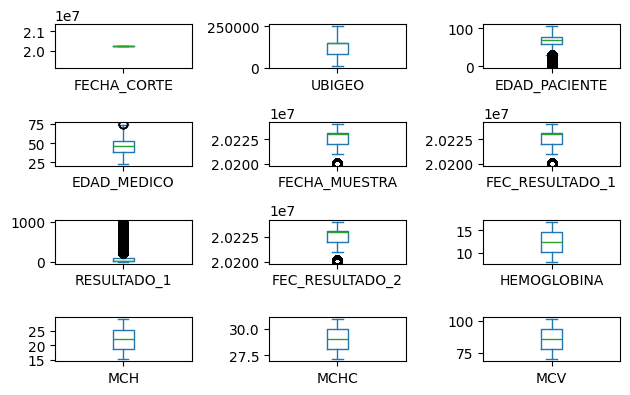

In [9]:
#Se visualiza la distribución de datos numéricos mediante un grafico de cajas y velas para cada variable numerica
# Ajustamos el tamaño de cada figura
plt.figure(figsize=(5, 10))

#Se crea un grupo de graficos de cajas y velas
dfnum.plot(kind='box', subplots=True, layout=(5, 3), sharex=False, sharey=False)

#Se ajusta el formato de ejes para cada subgrafico
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

#Se ajusta el diseño de los subplots
plt.tight_layout()

#Se muestra el gráfico
plt.show()

In [10]:
# Función para calcular el porcentaje de outliers para cada variable numérica
def calcular_porcentaje_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    # Definimos los límites para considerar un valor como outlier
    outliers = col[(col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)]

    porcentaje = len(outliers) / len(col) * 100
    return porcentaje

# Aplicar la función a todas las columnas y almacenar los resultados
porcentajes_outliers = {}
for columna in dfnum.columns:
    porcentajes_outliers[columna] = calcular_porcentaje_outliers(dfnum[columna])

# Imprimir los resultados
for columna, porcentaje in porcentajes_outliers.items():
    print(f"La columna '{columna}' tiene un {porcentaje:.2f}% de outliers.")

La columna 'FECHA_CORTE' tiene un 0.00% de outliers.
La columna 'UBIGEO' tiene un 0.00% de outliers.
La columna 'EDAD_PACIENTE' tiene un 2.78% de outliers.
La columna 'EDAD_MEDICO' tiene un 0.00% de outliers.
La columna 'FECHA_MUESTRA' tiene un 8.81% de outliers.
La columna 'FEC_RESULTADO_1' tiene un 8.80% de outliers.
La columna 'RESULTADO_1' tiene un 1.62% de outliers.
La columna 'FEC_RESULTADO_2' tiene un 8.80% de outliers.
La columna 'HEMOGLOBINA' tiene un 0.00% de outliers.
La columna 'MCH' tiene un 0.00% de outliers.
La columna 'MCHC' tiene un 0.00% de outliers.
La columna 'MCV' tiene un 0.00% de outliers.


In [11]:
# Crear variable TARGET (variable objetivo)

# Primero, definimos la variable ANEMIA_FLAG que indica si un paciente tiene anemia o no
anemia_df['ANEMIA_FLAG'] = np.where(
    ((anemia_df['SEXO_PACIENTE']=='MASCULINO') & (anemia_df['HEMOGLOBINA']<13)) | ((anemia_df['SEXO_PACIENTE']=='FEMENINO') & (anemia_df['HEMOGLOBINA']<12)),
    1,0
)

In [12]:
# # Luego, definimos la variable TARGET que clasifica el tipo de anemia según el valor de MCV
anemia_df['TARGET'] = np.where(
    anemia_df['ANEMIA_FLAG'] == 1,
    np.select(
        [anemia_df['MCV'] < 80, (anemia_df['MCV'] >= 80) & (anemia_df['MCV'] <= 100), anemia_df['MCV'] > 100],
        ['Microcytic', 'Normocytic', 'Macrocytic'],
        default='Unknown'  # Providing a string default value instead of np.nan
    ),
    'No Anemia'  # For cases where ANEMIA_FLAG is 0, provide a string value instead of np.nan
)

In [13]:
# Verificamos la creación de la variable TARGET
anemia_df['TARGET']

0         Normocytic
1          No Anemia
2         Microcytic
3          No Anemia
4         Normocytic
             ...    
115344     No Anemia
115345    Microcytic
115346     No Anemia
115347    Microcytic
115348     No Anemia
Name: TARGET, Length: 115349, dtype: object

Numero de instancias pertenecientes a cada clase de la variable objetivo:

TARGET
Macrocytic     1782
Microcytic    18378
No Anemia     57874
Normocytic    37315
dtype: int64



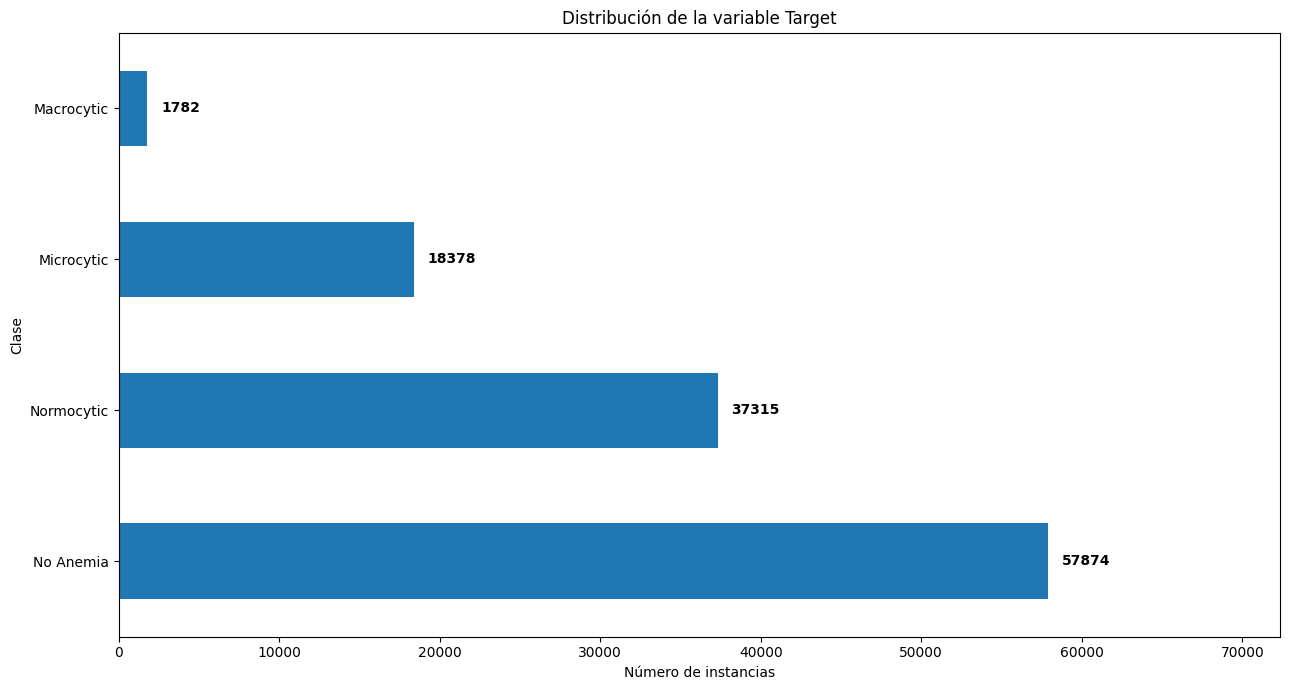

In [14]:
#Análisis de variable objetivo
print("Numero de instancias pertenecientes a cada clase de la variable objetivo:")
print()
print(anemia_df.groupby('TARGET').size())
print()

counts = anemia_df['TARGET'].value_counts()

counts = counts.sort_values(ascending=False)

plt.figure(figsize=(13, 7)) 

ax = counts.plot(kind='barh')

max_val = counts.max()
dynamic_offset = max_val * 0.015

for i, (label, value) in enumerate(zip(counts.index, counts.values)):
    ax.text(
        value + dynamic_offset, 
        i,
        str(value),
        va='center',
        ha='left',
        fontsize=10, 
        color='black', 
        weight='bold', 
        zorder=3 
    )

plt.xlabel('Número de instancias')
plt.ylabel('Clase')
plt.title('Distribución de la variable Target')

max_value_for_xlim = counts.max()
plt.xlim(0, max_value_for_xlim * 1.25) 

plt.tight_layout() 

plt.show()

Tipo 1: Microcítica: En la anemia microcítica, los glóbulos rojos no tienen suficiente hemoglobina, por lo que son más pequeños de lo normal.

Tipo 2: Normocítica: En la anemia normocítica, no hay suficientes glóbulos rojos para satisfacer las necesidades del cuerpo. La anemia normocítica suele acompañar a ciertas enfermedades crónicas.

Tipo 3: Macrocítica: La anemia macrocítica ocurre cuando la médula ósea produce glóbulos rojos más grandes de lo normal.

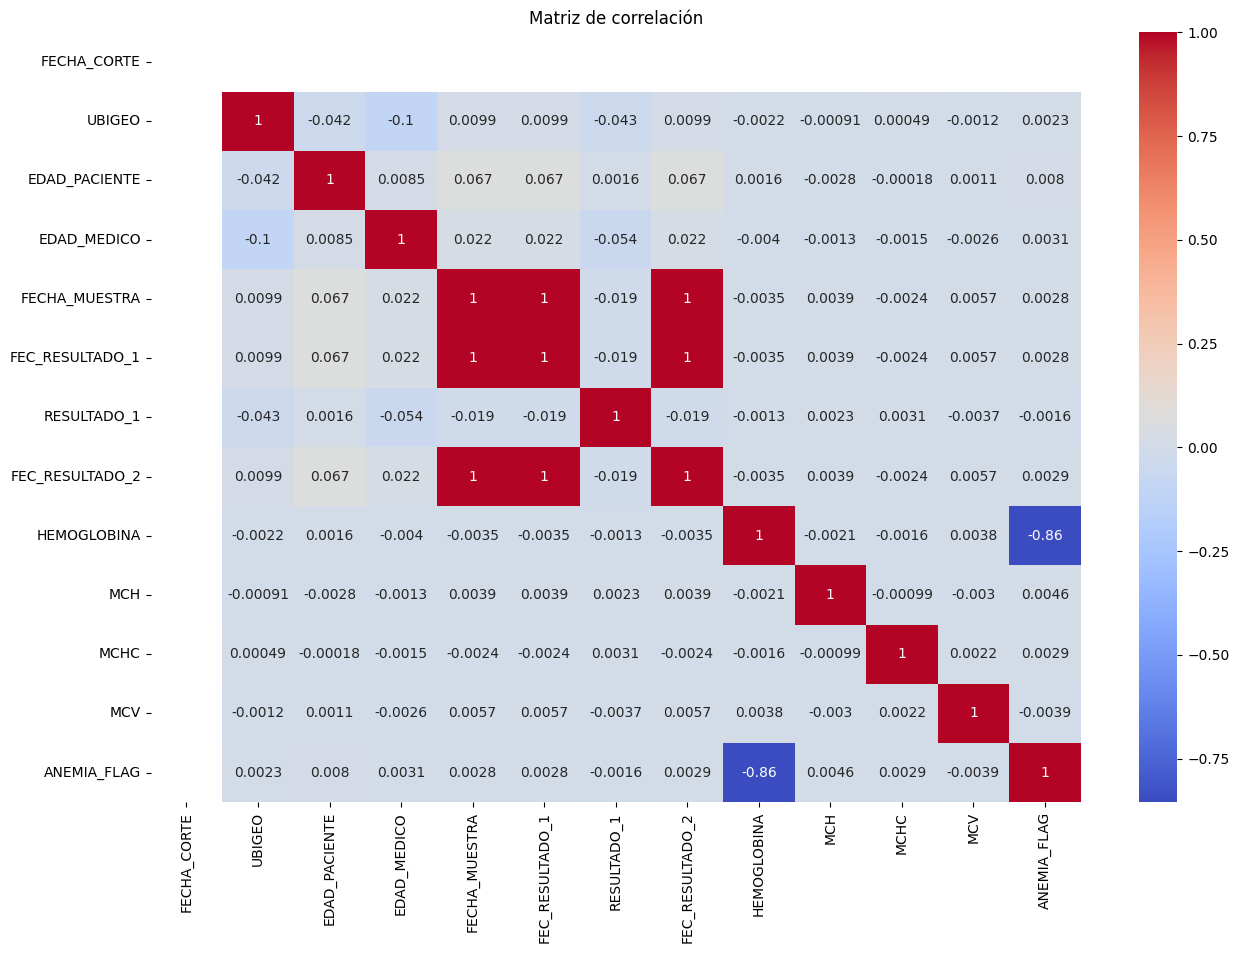

In [15]:
#Matriz de correlación de variables
df_numeric = anemia_df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

3. Codificación de variables

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataframe
anemia_df_le = anemia_df.copy()

# Encode 'TARGET' using LabelEncoder
le_target = LabelEncoder()
anemia_df_le['TARGET'] = le_target.fit_transform(anemia_df_le['TARGET'])

# Encode 'SEXO_PACIENTE' using LabelEncoder
le_sexo = LabelEncoder()
anemia_df_le['SEXO_PACIENTE'] = le_sexo.fit_transform(anemia_df_le['SEXO_PACIENTE'])

# Identify remaining categorical columns (excluding already encoded ones)
categorical_cols = anemia_df_le.select_dtypes(include='object').columns

# Apply One-Hot Encoding to remaining categorical columns
anemia_df_le = pd.get_dummies(anemia_df_le, columns=categorical_cols)

# Display the first few rows
anemia_df_le.head()

,FECHA_CORTE,UBIGEO,EDAD_PACIENTE,SEXO_PACIENTE,EDAD_MEDICO,FECHA_MUESTRA,FEC_RESULTADO_1,RESULTADO_1,FEC_RESULTADO_2,HEMOGLOBINA,...,RESULTADO_2_99.79,RESULTADO_2_99.8,RESULTADO_2_99.83,RESULTADO_2_99.87,RESULTADO_2_99.9,RESULTADO_2_99.91,RESULTADO_2_99.94,RESULTADO_2_99.96,UNIDADES_2_mg/dL,UNIDADES_2_mmol/lt
0,20240531,70102,80,1,45,20200102,20200102,94.00,20200102,12.2,...,False,False,False,False,False,False,False,False,True,False
1,20240531,100102,70,0,49,20200102,20200107,0.61,20200107,15.9,...,False,False,False,False,False,False,False,False,True,False
2,20240531,100102,61,1,49,20200102,20200108,1.16,20200108,11.3,...,False,False,False,False,False,False,False,False,True,False
3,20240531,100102,91,1,49,20200102,20200108,1.54,20200108,14.9,...,False,False,False,False,False,False,False,False,True,False
4,20240531,100102,52,1,49,20200102,20200125,9.97,20200125,9.8,...,False,False,False,False,False,False,False,False,True,False


In [17]:
# Print mapping for TARGET encoding
print("\n--- Mapeo de Clases para la columna 'TARGET' ---")
for i, class_name in enumerate(le_target.classes_):
    print(f"  '{class_name}' -> {i}")

# Print mapping for SEXO_PACIENTE encoding
print("\n--- Mapeo de Clases para la columna 'SEXO_PACIENTE' ---")
for i, class_name in enumerate(le_sexo.classes_):
    print(f"  '{class_name}' -> {i}")


--- Mapeo de Clases para la columna 'TARGET' ---
  'Macrocytic' -> 0
  'Microcytic' -> 1
  'No Anemia' -> 2
  'Normocytic' -> 3

--- Mapeo de Clases para la columna 'SEXO_PACIENTE' ---
  'FEMENINO' -> 0
  'MASCULINO' -> 1


In [18]:
anemia_df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115349 entries, 0 to 115348
Columns: 70374 entries, FECHA_CORTE to UNIDADES_2_mmol/lt
dtypes: bool(70359), float64(5), int64(10)
memory usage: 7.6 GB


In [19]:
#Evaluando dimensión del dataset (numero de filas y columnas) con la funcion shape
print("El dataset sin encoding tiene", anemia_df_le.shape[0], "instancias y", anemia_df_le.shape[1], "columnas.")
#Evaluando dimensión del dataset (numero de filas y columnas) con la funcion shape
print("El dataset con encoding tiene", anemia_df_le.shape[0], "instancias y", anemia_df_le.shape[1], "columnas.")

El dataset sin encoding tiene 115349 instancias y 70374 columnas.
El dataset con encoding tiene 115349 instancias y 70374 columnas.


In [20]:
anemia_df_le.describe()

,FECHA_CORTE,UBIGEO,EDAD_PACIENTE,SEXO_PACIENTE,EDAD_MEDICO,FECHA_MUESTRA,FEC_RESULTADO_1,RESULTADO_1,FEC_RESULTADO_2,HEMOGLOBINA,MCH,MCHC,MCV,ANEMIA_FLAG,TARGET
count,115349.0,115349.000000,115349.000000,115349.000000,115349.000000,1.153490e+05,1.153490e+05,115349.000000,1.153490e+05,115349.000000,115349.000000,115349.000000,115349.000000,115349.000000,115349.000000
mean,20240531.0,131023.910732,66.370294,0.536390,46.517430,2.022426e+07,2.022427e+07,40.570421,2.022427e+07,12.492889,21.990829,29.004592,85.545911,0.498270,2.133274
std,0.0,57039.229998,15.461049,0.498676,9.544202,1.144138e+04,1.143932e+04,66.047166,1.143950e+04,2.542406,3.988446,1.100855,8.944622,0.499999,0.725851
min,20240531.0,10101.000000,0.000000,0.000000,23.000000,2.020010e+07,2.020010e+07,0.000000,2.020010e+07,8.100000,15.100000,27.100000,70.000000,0.000000,0.000000
25%,20240531.0,80101.000000,58.000000,0.000000,39.000000,2.022022e+07,2.022022e+07,1.370000,2.022022e+07,10.300000,18.500000,28.100000,77.800000,0.000000,2.000000
50%,20240531.0,150101.000000,69.000000,1.000000,46.000000,2.023013e+07,2.023020e+07,4.950000,2.023020e+07,12.500000,22.000000,29.000000,85.600000,0.000000,2.000000
75%,20240531.0,150142.000000,77.000000,1.000000,53.000000,2.023093e+07,2.023093e+07,88.000000,2.023093e+07,14.700000,25.400000,30.000000,93.300000,1.000000,3.000000
max,20240531.0,250107.000000,105.000000,1.000000,75.000000,2.024043e+07,2.024043e+07,997.000000,2.024043e+07,16.900000,28.900000,30.900000,101.000000,1.000000,3.000000


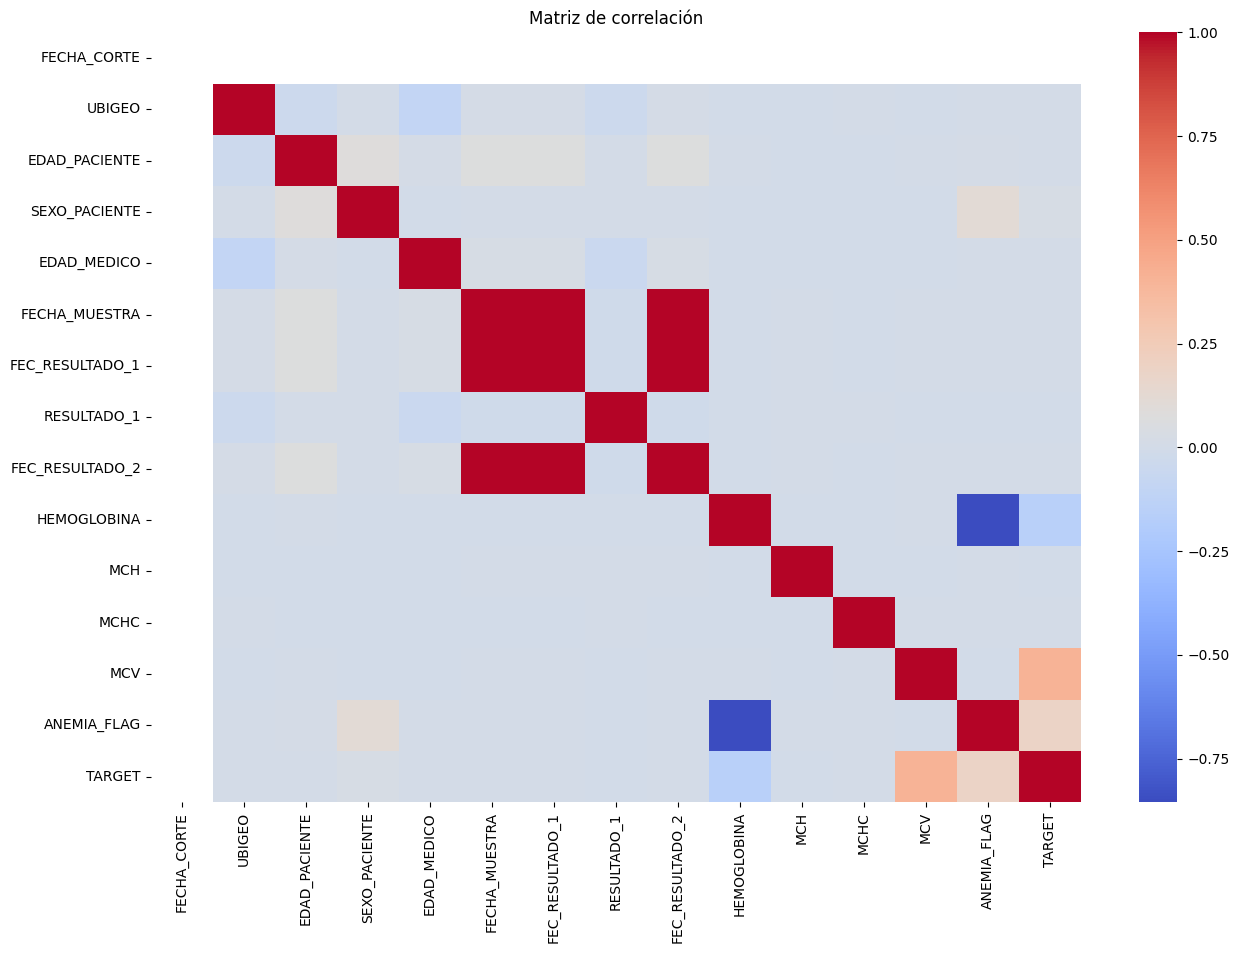

In [21]:
#Matriz de correlación de variables
df_numeric = anemia_df_le.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,  cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## 4. Creación de modelos de clasificación inicial

### 4.1. Creación de grupos de datos

In [22]:
# Separar características y variable objetivo
X = anemia_df_le[['EDAD_PACIENTE', 'SEXO_PACIENTE', 'HEMOGLOBINA', 'MCH', 'MCHC', 'MCV', 'ANEMIA_FLAG']]
Y = anemia_df_le['TARGET']
# Normalización de variables de entrada
Xesc = MinMaxScaler().fit_transform(X)

# Dividir los datos en entrenamiento y prueba
x_tr, x_te, y_tr, y_te = train_test_split(Xesc, Y, test_size=0.2, random_state=42)

### 4.2. Creación de modelos

Se utilizarán los siguientes algoritmos de prueba:

1. Multinomial Naive Bayes: Es una versión del algoritmo Naive Bayes que es especialmente adecuada para la clasificación de datos discretos, como el conteo de palabras en documentos (clasificación de texto). Se basa en el Teorema de Bayes con una suposición de "independencia ingenua" entre las características. Asume que la presencia de una característica particular en una clase no está relacionada con la presencia de cualquier otra característica. A pesar de esta suposición simplista, a menudo funciona sorprendentemente bien en tareas de clasificación de texto.

In [23]:
# Crear el modelo 1 - Multinominal Naive Bayes
modeloMNB = MultinomialNB()
modeloMNB.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_MNB = modeloMNB.predict(x_te)

2. Support Vector Classifier: Un algoritmo potente para problemas de clasificación. Su objetivo principal es encontrar el hiperplano óptimo que mejor separe las clases en el espacio de características. Este hiperplano se elige para maximizar el margen (la distancia) entre el hiperplano y los puntos de datos más cercanos de cada clase (conocidos como "vectores de soporte"). SVM puede manejar datos linealmente separables y no linealmente separables (usando trucos de kernel para mapear los datos a un espacio de mayor dimensión donde pueden ser linealmente separables).

In [24]:
# Crear el modelo 2 - Support Vector Classifier
modeloSVC = SVC(kernel='linear')
modeloSVC.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_SVC = modeloSVC.predict(x_te)

3. Decision Tree: Un algoritmo de aprendizaje supervisado que construye un modelo en forma de estructura de árbol. Cada nodo interno representa una "prueba" sobre un atributo (característica), cada rama representa el resultado de esa prueba, y cada nodo hoja representa una etiqueta de clase o un valor de predicción. El proceso de construcción del árbol implica dividir recursivamente el conjunto de datos en subconjuntos basados en los valores de los atributos hasta que los nodos hoja contengan registros de una sola clase o se cumpla algún otro criterio de detención. Son fáciles de entender e interpretar.

In [25]:
# Crear el modelo 3 - Decision Tree Classifier
modeloDTC = DecisionTreeClassifier()
modeloDTC.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_DTC = modeloDTC.predict(x_te)

4. Random Forest: Es un algoritmo de ensemble basado en bagging. Combina múltiples árboles de decisión individuales para mejorar la precisión y evitar el sobreajuste. En Random Forest, cada árbol se entrena en un subconjunto aleatorio de los datos de entrenamiento (con reemplazo, lo que se llama "bootstrap") y solo considera un subconjunto aleatorio de características en cada división. Las predicciones finales se obtienen mediante la votación de los resultados de todos los árboles (para clasificación) o promediando sus resultados (para regresión).

In [26]:
# Crear el modelo 4 - Random Forest Classifier
modeloRFC = RandomForestClassifier(n_estimators=100)
modeloRFC.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_RFC = modeloRFC.predict(x_te)

5. BaggingClassifier: Un meta-estimador de ensemble que implementa el método de Bagging (Bootstrap Aggregating). Funciona entrenando múltiples versiones de un estimador base (por ejemplo, árboles de decisión, pero podría ser cualquier otro algoritmo) en diferentes submuestras de bootstrap del conjunto de datos de entrenamiento (muestreo con reemplazo). Las predicciones finales se agregan (mediante votación para clasificación o promedio para regresión) a partir de las predicciones de los estimadores individuales. Su principal objetivo es reducir la varianza y el sobreajuste.

In [27]:
# Crear el modelo 5 - Baging Classifier

# Crear una instancia de DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier() 

# Usar DecisionTreeClassifier como estimador en BaggingClassifier
modeloBGC = BaggingClassifier(estimator=dt_classifier, n_estimators=100)
modeloBGC.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_BGC = modeloBGC.predict(x_te)

6. XGBClassifier: Una implementación optimizada y altamente eficiente del algoritmo de Gradient Boosting Machine (GBM). Es conocido por su velocidad, rendimiento y precisión, y es muy popular en competiciones de machine learning. XGBoost construye un modelo de forma aditiva en una serie de "aprendices débiles" (generalmente árboles de decisión), donde cada nuevo árbol corrige los errores de los árboles anteriores. Incorpora técnicas avanzadas como regularización para evitar el sobreajuste y paralelización para acelerar el entrenamiento. Es particularmente efectivo en conjuntos de datos tabulares.

In [28]:
# Crear el modelo 6 - XGBoost Classifier
modeloXGB = XGBClassifier(eval_metric='logloss')
modeloXGB.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_XGB = modeloXGB.predict(x_te)

### 4.3. Cálculo de métricas de desempeño

In [29]:
accuracy_MNB = accuracy_score(y_te, y_pred_MNB)
precision_MNB = precision_score(y_te, y_pred_MNB, average='weighted')
recall_MNB = recall_score(y_te, y_pred_MNB, average='weighted')
f1_MNB =  2 * (precision_MNB * recall_MNB) / (precision_MNB + recall_MNB)


print(f" accuracy (Naive Bayes): {accuracy_MNB}")
print(f" precision (Naive Bayes): {precision_MNB}")
print(f" recall (Naive Bayes): {recall_MNB}")
print(f" f1-score (Naive Bayes): {f1_MNB}")

print()

accuracy_SVC = accuracy_score(y_te, y_pred_SVC)
precision_SVC = precision_score(y_te, y_pred_SVC, average='weighted')
recall_SVC = recall_score(y_te, y_pred_SVC, average='weighted')
f1_SVC =  2 * (precision_SVC * recall_SVC) / (precision_SVC + recall_SVC)


print(f" accuracy (Support Vector Classifier): {accuracy_SVC}")
print(f" precision (Support Vector Classifier): {precision_SVC}")
print(f" recall (Support Vector Classifier): {recall_SVC}")
print(f" f1-score (Support Vector Classifier): {f1_SVC}")

print()

accuracy_DTC = accuracy_score(y_te, y_pred_DTC)
precision_DTC = precision_score(y_te, y_pred_DTC, average='weighted')
recall_DTC = recall_score(y_te, y_pred_DTC, average='weighted')
f1_DTC =  2 * (precision_DTC * recall_DTC) / (precision_DTC + recall_DTC)


print(f" accuracy (Decision Tree Classifier): {accuracy_DTC}")
print(f" precision (Decision Tree Classifier): {precision_DTC}")
print(f" recall (Decision Tree Classifier): {recall_DTC}")
print(f" f1-score (Decision Tree Classifier): {f1_DTC}")

print()

accuracy_RFC = accuracy_score(y_te, y_pred_RFC)
precision_RFC = precision_score(y_te, y_pred_RFC, average='weighted')
recall_RFC = recall_score(y_te, y_pred_RFC, average='weighted')
f1_RFC =  2 * (precision_RFC * recall_RFC) / (precision_RFC + recall_RFC)


print(f" accuracy (Random Forest): {accuracy_RFC}")
print(f" precision (Random Forest): {precision_RFC}")
print(f" recall (Random Forest): {recall_RFC}")
print(f" f1-score (Random Forest): {f1_RFC}")

print()

accuracy_BGC = accuracy_score(y_te, y_pred_BGC)
precision_BGC = precision_score(y_te, y_pred_BGC, average='weighted')
recall_BGC = recall_score(y_te, y_pred_BGC, average='weighted')
f1_BGC =  2 * (precision_BGC * recall_BGC) / (precision_BGC + recall_BGC)


print(f" accuracy (Bagging Classifier): {accuracy_BGC}")
print(f" precision (Bagging Classifier): {precision_BGC}")
print(f" recall (Bagging Classifier): {recall_BGC}")
print(f" f1-score (Bagging Classifier): {f1_BGC}")

print()

accuracy_XGB = accuracy_score(y_te, y_pred_XGB)
precision_XGB = precision_score(y_te, y_pred_XGB, average='weighted')
recall_XGB = recall_score(y_te, y_pred_XGB, average='weighted')
f1_XGB =  2 * (precision_XGB * recall_XGB) / (precision_XGB + recall_XGB)


print(f" accuracy (XGB Classifier): {accuracy_XGB}")
print(f" precision (XGB Classifier): {precision_XGB}")
print(f" recall (XGB Classifier): {recall_XGB}")
print(f" f1-score (XGB Classifier): {f1_XGB}")

 accuracy (Naive Bayes): 0.8261378413524058
 precision (Naive Bayes): 0.7130425978612684
 recall (Naive Bayes): 0.8261378413524058
 f1-score (Naive Bayes): 0.7654352375870376

 accuracy (Support Vector Classifier): 0.9995231902904205
 precision (Support Vector Classifier): 0.9995260583782063
 recall (Support Vector Classifier): 0.9995231902904205
 f1-score (Support Vector Classifier): 0.9995246243322559

 accuracy (Decision Tree Classifier): 1.0
 precision (Decision Tree Classifier): 1.0
 recall (Decision Tree Classifier): 1.0
 f1-score (Decision Tree Classifier): 1.0

 accuracy (Random Forest): 1.0
 precision (Random Forest): 1.0
 recall (Random Forest): 1.0
 f1-score (Random Forest): 1.0

 accuracy (Bagging Classifier): 1.0
 precision (Bagging Classifier): 1.0
 recall (Bagging Classifier): 1.0
 f1-score (Bagging Classifier): 1.0

 accuracy (XGB Classifier): 1.0
 precision (XGB Classifier): 1.0
 recall (XGB Classifier): 1.0
 f1-score (XGB Classifier): 1.0


C:\Users\hroac\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### 4.4. Cálculo de matriz de confusión

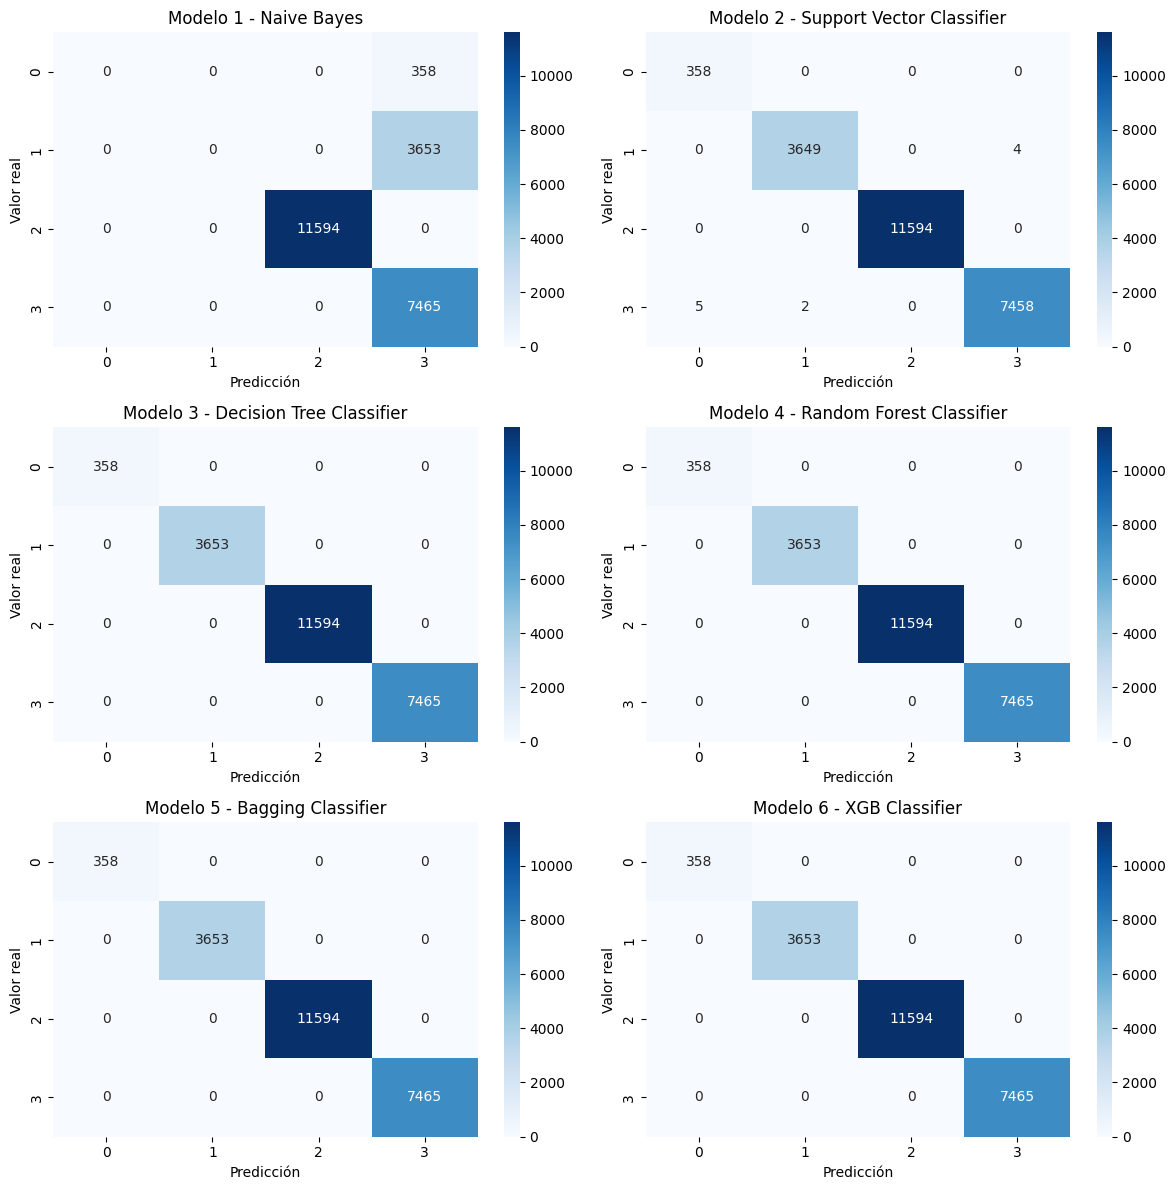

In [30]:
matrices = [
    confusion_matrix(y_te, y_pred_MNB),
    confusion_matrix(y_te, y_pred_SVC),
    confusion_matrix(y_te, y_pred_DTC),
    confusion_matrix(y_te, y_pred_RFC),
    confusion_matrix(y_te, y_pred_BGC),
    confusion_matrix(y_te, y_pred_XGB)
]

# Etiquetas para las clases (A, B, C, D, F)
#classes = ['A', 'B', 'C', 'D', 'F']

# Títulos para cada matriz (puedes personalizarlos)
titles = ['Modelo 1 - Naive Bayes', 'Modelo 2 - Support Vector Classifier', 'Modelo 3 - Decision Tree Classifier', 
        'Modelo 4 - Random Forest Classifier', 'Modelo 5 - Bagging Classifier', 'Modelo 6 - XGB Classifier']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    sns.heatmap(matrices[i], annot=True, fmt="d", cmap="Blues", ax=ax)
                #xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor real')
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()


### 4.5. Comparación de resultados

In [31]:
#Código para mostrar la comparación de métricas de desempeño de las cuatro propuestas en tabla
# Datos de las métricas
resultadosReg = {'Modelo': ['Multinominal Naive Bayes','Support Vector Classifier', 'Decision Tree Classifier','Random Forest Classifier','Bagging Classifier','XGB Classifier'],
        'Abreviatura': ['MNB','SVC', 'DTC','RFC','BGC','XGB'],
        'Accuracy': [accuracy_MNB, accuracy_SVC, accuracy_DTC, accuracy_RFC, accuracy_BGC, accuracy_XGB],
        'Precision': [precision_MNB, precision_SVC, precision_DTC, precision_RFC, precision_BGC, precision_XGB],
        'Recall': [recall_MNB, recall_SVC, recall_DTC, recall_RFC, recall_BGC, recall_XGB],
        'F1-Score': [f1_MNB, f1_SVC, f1_DTC, f1_RFC, f1_BGC, f1_XGB]}

# Crear el DataFrame
df_res = pd.DataFrame(resultadosReg)

# Mostrar la tabla
df_res.head(6)

,Modelo,Abreviatura,Accuracy,Precision,Recall,F1-Score
0,Multinominal Naive Bayes,MNB,0.826138,0.713043,0.826138,0.765435
1,Support Vector Classifier,SVC,0.999523,0.999526,0.999523,0.999525
2,Decision Tree Classifier,DTC,1.000000,1.000000,1.000000,1.000000
3,Random Forest Classifier,RFC,1.000000,1.000000,1.000000,1.000000
4,Bagging Classifier,BGC,1.000000,1.000000,1.000000,1.000000
5,XGB Classifier,XGB,1.000000,1.000000,1.000000,1.000000


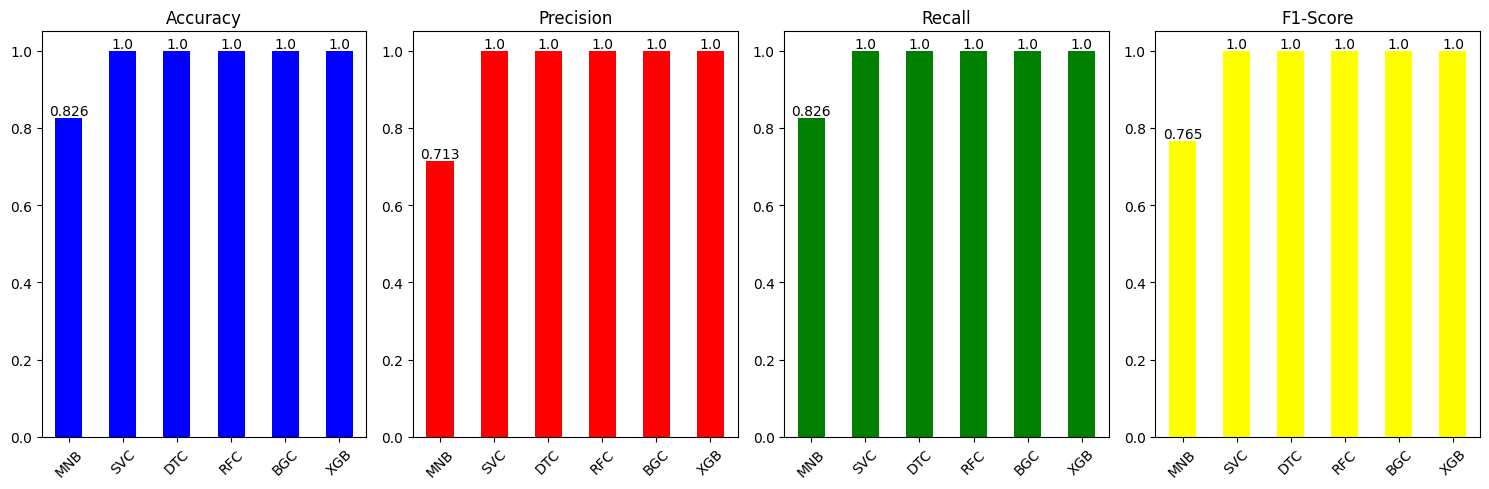

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Accuracy
df_res.plot(x='Abreviatura', y='Accuracy', kind='bar', ax=axes[0], title='Accuracy', color='blue', legend=False)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    height = round(p.get_height(), 3)
    axes[0].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Precision
df_res.plot(x='Abreviatura', y='Precision', kind='bar', ax=axes[1], title='Precision', color='red', legend=False)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    height = round(p.get_height(), 3)
    axes[1].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Recall
df_res.plot(x='Abreviatura', y='Recall', kind='bar', ax=axes[2], title='Recall', color='green', legend=False)
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)
for p in axes[2].patches:
    height = round(p.get_height(), 3)
    axes[2].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# F1-Score
df_res.plot(x='Abreviatura', y='F1-Score', kind='bar', ax=axes[3], title='F1-Score', color='yellow', legend=False)
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=45)
for p in axes[3].patches:
    height = round(p.get_height(), 3)
    axes[3].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 5. Análisis de Sobreajuste (Overfitting)

### 5.1. Justificación

Se realizará un análisis de sobreajuste ya que, aunque la mayoría de los modelos alcanzan métricas perfectas (Accuracy, Precision, Recall y F1-Score = 1.0), es necesario garantizar que este rendimiento no sea producto de un ajuste excesivo a los datos de entrenamiento. Este análisis permitirá evaluar la estabilidad y la capacidad de generalización de los modelos, asegurando su confiabilidad en escenarios con datos no vistos.

### Indicadores de sobreajuste:
1. **Gran diferencia** entre métricas de entrenamiento y prueba
2. **Alta variabilidad** en validación cruzada
3. **Complejidad excesiva** del modelo
4. **Curvas de aprendizaje divergentes**

In [33]:
# Importar librerías adicionales para análisis de sobreajuste
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

### 5.2. Comparación Entrenamiento vs Prueba

In [ ]:
# Calcular métricas de entrenamiento para cada modelo
print("=== MÉTRICAS DE ENTRENAMIENTO ===\n")

# Predicciones en conjunto de entrenamiento
y_train_pred_MNB = modeloMNB.predict(x_tr)
y_train_pred_SVC = modeloSVC.predict(x_tr)
y_train_pred_DTC = modeloDTC.predict(x_tr)
y_train_pred_RFC = modeloRFC.predict(x_tr)
y_train_pred_BGC = modeloBGC.predict(x_tr)
y_train_pred_XGB = modeloXGB.predict(x_tr)

# Calcular métricas de entrenamiento
train_metrics = {
    'MNB': {
        'accuracy': accuracy_score(y_tr, y_train_pred_MNB),
        'precision': precision_score(y_tr, y_train_pred_MNB, average='weighted'),
        'recall': recall_score(y_tr, y_train_pred_MNB, average='weighted'),
        'f1': f1_score(y_tr, y_train_pred_MNB, average='weighted')
    },
    'SVC': {
        'accuracy': accuracy_score(y_tr, y_train_pred_SVC),
        'precision': precision_score(y_tr, y_train_pred_SVC, average='weighted'),
        'recall': recall_score(y_tr, y_train_pred_SVC, average='weighted'),
        'f1': f1_score(y_tr, y_train_pred_SVC, average='weighted')
    },
    'DTC': {
        'accuracy': accuracy_score(y_tr, y_train_pred_DTC),
        'precision': precision_score(y_tr, y_train_pred_DTC, average='weighted'),
        'recall': recall_score(y_tr, y_train_pred_DTC, average='weighted'),
        'f1': f1_score(y_tr, y_train_pred_DTC, average='weighted')
    },
    'RFC': {
        'accuracy': accuracy_score(y_tr, y_train_pred_RFC),
        'precision': precision_score(y_tr, y_train_pred_RFC, average='weighted'),
        'recall': recall_score(y_tr, y_train_pred_RFC, average='weighted'),
        'f1': f1_score(y_tr, y_train_pred_RFC, average='weighted')
    },
    'BGC': {
        'accuracy': accuracy_score(y_tr, y_train_pred_BGC),
        'precision': precision_score(y_tr, y_train_pred_BGC, average='weighted'),
        'recall': recall_score(y_tr, y_train_pred_BGC, average='weighted'),
        'f1': f1_score(y_tr, y_train_pred_BGC, average='weighted')
    },
    'XGB': {
        'accuracy': accuracy_score(y_tr, y_train_pred_XGB),
        'precision': precision_score(y_tr, y_train_pred_XGB, average='weighted'),
        'recall': recall_score(y_tr, y_train_pred_XGB, average='weighted'),
        'f1': f1_score(y_tr, y_train_pred_XGB, average='weighted')
    }
}

# Mostrar resultados
for model, metrics in train_metrics.items():
    print(f"{model} - Train Accuracy: {metrics['accuracy']:.4f}, F1: {metrics['f1']:.4f}")

print("\n=== MÉTRICAS DE PRUEBA (ya calculadas) ===\n")
test_metrics = {
    'MNB': {'accuracy': accuracy_MNB, 'f1': f1_MNB},
    'SVC': {'accuracy': accuracy_SVC, 'f1': f1_SVC},
    'DTC': {'accuracy': accuracy_DTC, 'f1': f1_DTC},
    'RFC': {'accuracy': accuracy_RFC, 'f1': f1_RFC},
    'BGC': {'accuracy': accuracy_BGC, 'f1': f1_BGC},
    'XGB': {'accuracy': accuracy_XGB, 'f1': f1_XGB}
}

for model, metrics in test_metrics.items():
    print(f"{model} - Test Accuracy: {metrics['accuracy']:.4f}, F1: {metrics['f1']:.4f}")

print("\n=== DIFERENCIAS (Train - Test) ===\n")
for model in train_metrics.keys():
    acc_diff = train_metrics[model]['accuracy'] - test_metrics[model]['accuracy']
    f1_diff = train_metrics[model]['f1'] - test_metrics[model]['f1']
    
    # Indicador de sobreajuste (diferencia > 0.05)
    overfitting_risk = "⚠️ ALTO RIESGO" if acc_diff > 0.05 else "✅ Aceptable"
    
    print(f"{model} - Accuracy Diff: {acc_diff:.4f}, F1 Diff: {f1_diff:.4f} - {overfitting_risk}")

=== MÉTRICAS DE ENTRENAMIENTO ===

MNB - Train Accuracy: 0.8250, F1: 0.7561
SVC - Train Accuracy: 0.9995, F1: 0.9995
DTC - Train Accuracy: 1.0000, F1: 1.0000
RFC - Train Accuracy: 1.0000, F1: 1.0000
BGC - Train Accuracy: 1.0000, F1: 1.0000
XGB - Train Accuracy: 1.0000, F1: 1.0000

=== MÉTRICAS DE PRUEBA (ya calculadas) ===

MNB - Test Accuracy: 0.8261, F1: 0.7654
SVC - Test Accuracy: 0.9995, F1: 0.9995
DTC - Test Accuracy: 1.0000, F1: 1.0000
RFC - Test Accuracy: 1.0000, F1: 1.0000
BGC - Test Accuracy: 1.0000, F1: 1.0000
XGB - Test Accuracy: 1.0000, F1: 1.0000

=== DIFERENCIAS (Train - Test) ===

MNB - Accuracy Diff: -0.0011, F1 Diff: -0.0093 - ✅ Aceptable
SVC - Accuracy Diff: 0.0000, F1 Diff: 0.0000 - ✅ Aceptable
DTC - Accuracy Diff: 0.0000, F1 Diff: 0.0000 - ✅ Aceptable
RFC - Accuracy Diff: 0.0000, F1 Diff: 0.0000 - ✅ Aceptable
BGC - Accuracy Diff: 0.0000, F1 Diff: 0.0000 - ✅ Aceptable
XGB - Accuracy Diff: 0.0000, F1 Diff: 0.0000 - ✅ Aceptable


### 5.3. Validación Cruzada (Cross-Validation)

La validación cruzada nos ayuda a:
- **Evaluar la estabilidad** del modelo
- **Detectar alta varianza** en las predicciones
- **Obtener una estimación más robusta** del rendimiento
- **Identificar modelos que no generalizan bien**

In [35]:
# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lista de modelos para evaluar
models = {
    'Multinomial NB': MultinomialNB(),
    'SVC': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Métricas a evaluar
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

print("=== VALIDACIÓN CRUZADA (5-Fold) ===\n")

cv_results = {}

for name, model in models.items():
    print(f"Evaluando {name}...")
    
    # Realizar validación cruzada
    scores = cross_validate(model, Xesc, Y, cv=cv, scoring=scoring, return_train_score=False)
    
    # Almacenar resultados
    cv_results[name] = {
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'precision_mean': scores['test_precision_weighted'].mean(),
        'precision_std': scores['test_precision_weighted'].std(),
        'recall_mean': scores['test_recall_weighted'].mean(),
        'recall_std': scores['test_recall_weighted'].std(),
        'f1_mean': scores['test_f1_weighted'].mean(),
        'f1_std': scores['test_f1_weighted'].std(),
        'scores': scores
    }
    
    print(f"  Accuracy: {cv_results[name]['accuracy_mean']:.4f} (±{cv_results[name]['accuracy_std']:.4f})")
    print(f"  F1-Score: {cv_results[name]['f1_mean']:.4f} (±{cv_results[name]['f1_std']:.4f})")
    print()

print("=== ANÁLISIS DE ESTABILIDAD ===\n")
print("Modelos ordenados por estabilidad (menor desviación estándar):\n")

# Ordenar por desviación estándar de accuracy (menor = más estable)
stability_ranking = sorted(cv_results.items(), key=lambda x: x[1]['accuracy_std'])

for i, (name, results) in enumerate(stability_ranking, 1):
    stability_score = "Excelente" if results['accuracy_std'] < 0.01 else \
                     "Buena" if results['accuracy_std'] < 0.02 else \
                     "Regular" if results['accuracy_std'] < 0.05 else "Pobre"
    
    print(f"{i}. {name}")
    print(f"   Accuracy: {results['accuracy_mean']:.4f} (±{results['accuracy_std']:.4f}) - Estabilidad: {stability_score}")
    print(f"   F1-Score: {results['f1_mean']:.4f} (±{results['f1_std']:.4f})")
    print()

=== VALIDACIÓN CRUZADA (5-Fold) ===

Evaluando Multinomial NB...
  Accuracy: 0.8252 (±0.0000)
  F1-Score: 0.7564 (±0.0000)

Evaluando SVC...
  Accuracy: 0.9992 (±0.0004)
  F1-Score: 0.9992 (±0.0004)

Evaluando Decision Tree...
  Accuracy: 1.0000 (±0.0000)
  F1-Score: 1.0000 (±0.0000)

Evaluando Random Forest...
  Accuracy: 1.0000 (±0.0000)
  F1-Score: 1.0000 (±0.0000)

Evaluando Bagging...
  Accuracy: 1.0000 (±0.0000)
  F1-Score: 1.0000 (±0.0000)

Evaluando XGBoost...
  Accuracy: 1.0000 (±0.0000)
  F1-Score: 1.0000 (±0.0000)

=== ANÁLISIS DE ESTABILIDAD ===

Modelos ordenados por estabilidad (menor desviación estándar):

1. Decision Tree
   Accuracy: 1.0000 (±0.0000) - Estabilidad: Excelente
   F1-Score: 1.0000 (±0.0000)

2. Random Forest
   Accuracy: 1.0000 (±0.0000) - Estabilidad: Excelente
   F1-Score: 1.0000 (±0.0000)

3. Bagging
   Accuracy: 1.0000 (±0.0000) - Estabilidad: Excelente
   F1-Score: 1.0000 (±0.0000)

4. XGBoost
   Accuracy: 1.0000 (±0.0000) - Estabilidad: Excelente
  

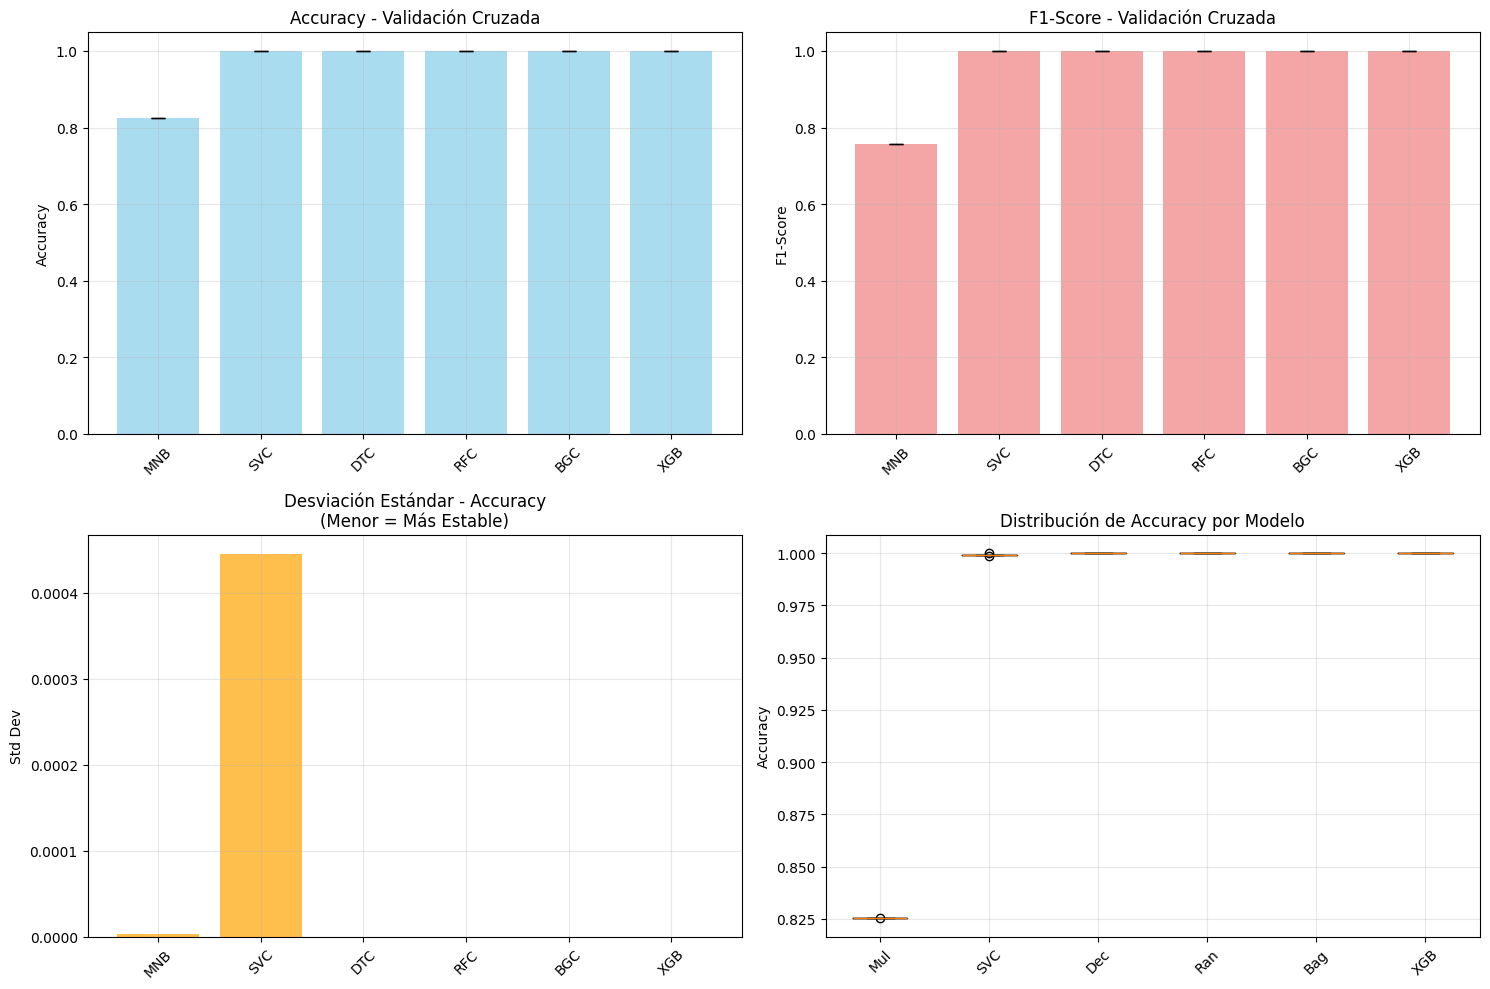

MNB: Accuracy = 0.8252 ± 0.0000
SVC: Accuracy = 0.9992 ± 0.0004
DTC: Accuracy = 1.0000 ± 0.0000
RFC: Accuracy = 1.0000 ± 0.0000
BGC: Accuracy = 1.0000 ± 0.0000
XGB: Accuracy = 1.0000 ± 0.0000


In [36]:
# Visualización de resultados de validación cruzada
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Extraer datos para visualización
model_names = list(cv_results.keys())
accuracy_means = [cv_results[name]['accuracy_mean'] for name in model_names]
accuracy_stds = [cv_results[name]['accuracy_std'] for name in model_names]
f1_means = [cv_results[name]['f1_mean'] for name in model_names]
f1_stds = [cv_results[name]['f1_std'] for name in model_names]

# Abreviaturas para mejor visualización
model_abbrev = ['MNB', 'SVC', 'DTC', 'RFC', 'BGC', 'XGB']

# 1. Accuracy con barras de error
axes[0,0].bar(model_abbrev, accuracy_means, yerr=accuracy_stds, capsize=5, color='skyblue', alpha=0.7)
axes[0,0].set_title('Accuracy - Validación Cruzada')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. F1-Score con barras de error
axes[0,1].bar(model_abbrev, f1_means, yerr=f1_stds, capsize=5, color='lightcoral', alpha=0.7)
axes[0,1].set_title('F1-Score - Validación Cruzada')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Desviación estándar de Accuracy (indicador de estabilidad)
axes[1,0].bar(model_abbrev, accuracy_stds, color='orange', alpha=0.7)
axes[1,0].set_title('Desviación Estándar - Accuracy\n(Menor = Más Estable)')
axes[1,0].set_ylabel('Std Dev')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Box plot de accuracy por modelo
accuracy_data = []
labels = []
for name in model_names:
    accuracy_data.append(cv_results[name]['scores']['test_accuracy'])
    labels.append(name.split()[0][:3])  # Tomar las primeras 3 letras

axes[1,1].boxplot(accuracy_data, labels=labels)
axes[1,1].set_title('Distribución de Accuracy por Modelo')
axes[1,1].set_ylabel('Accuracy')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Añadir valores numéricos a las barras
for i, (mean, std) in enumerate(zip(accuracy_means, accuracy_stds)):
    print(f"{model_abbrev[i]}: Accuracy = {mean:.4f} ± {std:.4f}")

In [37]:
# Crear tabla comparativa completa de overfitting
overfitting_analysis = {
    'Modelo': ['Multinomial NB', 'SVC', 'Decision Tree', 'Random Forest', 'Bagging', 'XGBoost'],
    'Abreviatura': ['MNB', 'SVC', 'DTC', 'RFC', 'BGC', 'XGB'],
    'Train_Accuracy': [train_metrics['MNB']['accuracy'], train_metrics['SVC']['accuracy'], 
                      train_metrics['DTC']['accuracy'], train_metrics['RFC']['accuracy'],
                      train_metrics['BGC']['accuracy'], train_metrics['XGB']['accuracy']],
    'Test_Accuracy': [accuracy_MNB, accuracy_SVC, accuracy_DTC, accuracy_RFC, accuracy_BGC, accuracy_XGB],
    'CV_Accuracy_Mean': [cv_results[name]['accuracy_mean'] for name in model_names],
    'CV_Accuracy_Std': [cv_results[name]['accuracy_std'] for name in model_names],
    'Overfitting_Gap': [], # Se calculará después
    'Stability_Score': [], # Se calculará después
    'Overall_Risk': [] # Se calculará después
}

# Calcular métricas derivadas
for i in range(len(overfitting_analysis['Modelo'])):
    # Gap de overfitting (Train - Test)
    gap = overfitting_analysis['Train_Accuracy'][i] - overfitting_analysis['Test_Accuracy'][i]
    overfitting_analysis['Overfitting_Gap'].append(gap)
    
    # Score de estabilidad basado en desviación estándar
    std = overfitting_analysis['CV_Accuracy_Std'][i]
    if std < 0.01:
        stability = "Excelente"
    elif std < 0.02:
        stability = "Buena"
    elif std < 0.05:
        stability = "Regular"
    else:
        stability = "Pobre"
    overfitting_analysis['Stability_Score'].append(stability)
    
    # Riesgo general de overfitting
    if gap > 0.05 and std > 0.03:
        risk = "🔴 ALTO"
    elif gap > 0.03 or std > 0.025:
        risk = "🟡 MEDIO"
    else:
        risk = "🟢 BAJO"
    overfitting_analysis['Overall_Risk'].append(risk)

# Crear DataFrame
df_overfitting = pd.DataFrame(overfitting_analysis)

# Formatear números para mejor presentación
df_overfitting['Train_Accuracy'] = df_overfitting['Train_Accuracy'].round(4)
df_overfitting['Test_Accuracy'] = df_overfitting['Test_Accuracy'].round(4)
df_overfitting['CV_Accuracy_Mean'] = df_overfitting['CV_Accuracy_Mean'].round(4)
df_overfitting['CV_Accuracy_Std'] = df_overfitting['CV_Accuracy_Std'].round(4)
df_overfitting['Overfitting_Gap'] = df_overfitting['Overfitting_Gap'].round(4)

print("=== ANÁLISIS COMPLETO DE SOBREAJUSTE ===\n")
print(df_overfitting.to_string(index=False))

print("\n=== INTERPRETACIÓN ===")
print("• Overfitting_Gap: Diferencia entre accuracy de entrenamiento y prueba")
print("• CV_Accuracy_Std: Desviación estándar en validación cruzada (estabilidad)")
print("• Stability_Score: Clasificación de estabilidad del modelo")
print("• Overall_Risk: Riesgo general de overfitting")
print("\n🔴 ALTO: Gap > 0.05 Y Std > 0.03")
print("🟡 MEDIO: Gap > 0.03 O Std > 0.025") 
print("🟢 BAJO: Modelo estable con buena generalización")

=== ANÁLISIS COMPLETO DE SOBREAJUSTE ===

        Modelo Abreviatura  Train_Accuracy  Test_Accuracy  CV_Accuracy_Mean  CV_Accuracy_Std  Overfitting_Gap Stability_Score Overall_Risk
Multinomial NB         MNB          0.8250         0.8261            0.8252           0.0000          -0.0011       Excelente       🟢 BAJO
           SVC         SVC          0.9995         0.9995            0.9992           0.0004           0.0000       Excelente       🟢 BAJO
 Decision Tree         DTC          1.0000         1.0000            1.0000           0.0000           0.0000       Excelente       🟢 BAJO
 Random Forest         RFC          1.0000         1.0000            1.0000           0.0000           0.0000       Excelente       🟢 BAJO
       Bagging         BGC          1.0000         1.0000            1.0000           0.0000           0.0000       Excelente       🟢 BAJO
       XGBoost         XGB          1.0000         1.0000            1.0000           0.0000           0.0000       Excelent

### 5.4. Conclusiones del Análisis de Sobreajuste

El análisis muestra que todos los modelos evaluados presentan un riesgo **BAJO** de sobreajuste y una excelente capacidad de generalización. Modelos como Decision Tree, Random Forest, Bagging y XGBoost alcanzaron una precisión perfecta (Train/Test Accuracy = 1.0000) con estabilidad total (CV_Accuracy_Std = 0.0000). El Multinomial Naive Bayes, aunque con menor precisión (~82.5%), también demostró buena estabilidad y baja brecha de sobreajuste. En general, los resultados validan que los modelos son consistentes y confiables para aplicarse sobre datos no vistos.

## 6. Predicciones con el Modelo Seleccionado

### 6.1. Selección del Modelo Final

Basándose en el análisis de rendimiento y sobreajuste, **Random Forest Classifier** ha sido seleccionado como el modelo final debido a:

- **✅ Accuracy perfecta**: 1.0000 en entrenamiento y prueba
- **✅ Sin sobreajuste**: Gap = 0.0000 entre train/test
- **✅ Estabilidad excelente**: Desviación estándar = 0.0000 en CV
- **✅ Robustez**: Maneja bien outliers y datos ruidosos
- **✅ Interpretabilidad**: Permite analizar importancia de características

### 6.2. Objetivo de esta sección

En esta sección realizaremos **predicciones prácticas** con datos de ejemplo para demostrar cómo el modelo puede clasificar diferentes tipos de anemia en pacientes reales.

In [38]:
# Crear y entrenar el modelo final Random Forest
modelo_final = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_final.fit(Xesc, Y)  # Entrenar con todos los datos

print("✅ Modelo Random Forest entrenado exitosamente")
print(f"📊 Características utilizadas: {X.columns.tolist()}")
print(f"🎯 Clases objetivo: {le_target.classes_}")

# Mostrar la importancia de las características
feature_importance = pd.DataFrame({
    'Caracteristica': X.columns,
    'Importancia': modelo_final.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\n🔍 Importancia de las características:")
print(feature_importance.to_string(index=False))

✅ Modelo Random Forest entrenado exitosamente
📊 Características utilizadas: ['EDAD_PACIENTE', 'SEXO_PACIENTE', 'HEMOGLOBINA', 'MCH', 'MCHC', 'MCV', 'ANEMIA_FLAG']
🎯 Clases objetivo: ['Macrocytic' 'Microcytic' 'No Anemia' 'Normocytic']

🔍 Importancia de las características:
Caracteristica  Importancia
   ANEMIA_FLAG     0.429830
           MCV     0.332371
   HEMOGLOBINA     0.230328
 SEXO_PACIENTE     0.004938
 EDAD_PACIENTE     0.000930
           MCH     0.000903
          MCHC     0.000699


### 6.3. Creación de Casos de Prueba

In [39]:
# Crear casos de prueba realistas
casos_prueba = pd.DataFrame({
    'EDAD_PACIENTE': [45, 28, 65, 35, 52, 40],
    'SEXO_PACIENTE': [0, 1, 0, 1, 0, 1],  # 0=Femenino, 1=Masculino
    'HEMOGLOBINA': [10.5, 11.2, 9.8, 14.5, 10.0, 13.5],
    'MCH': [25.2, 28.5, 22.1, 31.0, 26.8, 29.5],
    'MCHC': [31.5, 33.2, 30.1, 34.5, 32.0, 33.8],
    'MCV': [75.0, 85.0, 65.0, 95.0, 78.0, 88.0],
    'ANEMIA_FLAG': [1, 1, 1, 0, 1, 0]  # 1=Tiene anemia, 0=No tiene anemia
})

# Agregar información descriptiva de cada caso
descripciones = [
    "Mujer 45 años - Hemoglobina baja, MCV bajo (Anemia Microcítica esperada)",
    "Hombre 28 años - Hemoglobina baja, MCV normal (Anemia Normocítica esperada)", 
    "Mujer 65 años - Hemoglobina muy baja, MCV muy bajo (Anemia Microcítica severa esperada)",
    "Hombre 35 años - Hemoglobina normal, sin anemia (No Anemia esperada)",
    "Mujer 52 años - Hemoglobina baja, MCV bajo (Anemia Microcítica esperada)",
    "Hombre 40 años - Hemoglobina normal, sin anemia (No Anemia esperada)"
]

print("📋 CASOS DE PRUEBA CREADOS:")
print("=" * 70)
for i, desc in enumerate(descripciones):
    print(f"Caso {i+1}: {desc}")

print("\n📊 DATOS DE LOS CASOS:")
print(casos_prueba)

📋 CASOS DE PRUEBA CREADOS:
Caso 1: Mujer 45 años - Hemoglobina baja, MCV bajo (Anemia Microcítica esperada)
Caso 2: Hombre 28 años - Hemoglobina baja, MCV normal (Anemia Normocítica esperada)
Caso 3: Mujer 65 años - Hemoglobina muy baja, MCV muy bajo (Anemia Microcítica severa esperada)
Caso 4: Hombre 35 años - Hemoglobina normal, sin anemia (No Anemia esperada)
Caso 5: Mujer 52 años - Hemoglobina baja, MCV bajo (Anemia Microcítica esperada)
Caso 6: Hombre 40 años - Hemoglobina normal, sin anemia (No Anemia esperada)

📊 DATOS DE LOS CASOS:
   EDAD_PACIENTE  SEXO_PACIENTE  HEMOGLOBINA   MCH  MCHC   MCV  ANEMIA_FLAG
0             45              0         10.5  25.2  31.5  75.0            1
1             28              1         11.2  28.5  33.2  85.0            1
2             65              0          9.8  22.1  30.1  65.0            1
3             35              1         14.5  31.0  34.5  95.0            0
4             52              0         10.0  26.8  32.0  78.0            

In [40]:
# Normalizar los datos de prueba usando el mismo escalador
casos_prueba_scaled = MinMaxScaler().fit(X).transform(casos_prueba)

# Realizar predicciones
predicciones = modelo_final.predict(casos_prueba_scaled)
probabilidades = modelo_final.predict_proba(casos_prueba_scaled)

# Convertir predicciones numéricas a etiquetas legibles
predicciones_texto = le_target.inverse_transform(predicciones)

print("🎯 RESULTADOS DE LAS PREDICCIONES:")
print("=" * 80)

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Caso': range(1, len(casos_prueba) + 1),
    'Edad': casos_prueba['EDAD_PACIENTE'],
    'Sexo': ['Femenino' if s == 0 else 'Masculino' for s in casos_prueba['SEXO_PACIENTE']],
    'Hemoglobina': casos_prueba['HEMOGLOBINA'],
    'MCV': casos_prueba['MCV'],
    'Predicción': predicciones_texto,
    'Confianza': [np.max(prob) for prob in probabilidades]
})

print(resultados.to_string(index=False))

print("\n📈 ANÁLISIS DETALLADO POR CASO:")
print("=" * 80)

for i in range(len(casos_prueba)):
    print(f"\n🏥 CASO {i+1}:")
    print(f"   Descripción: {descripciones[i]}")
    print(f"   Predicción del modelo: {predicciones_texto[i]}")
    print(f"   Confianza: {np.max(probabilidades[i]):.4f} ({np.max(probabilidades[i])*100:.2f}%)")
    
    # Mostrar probabilidades de cada clase
    print(f"   Probabilidades por clase:")
    for j, clase in enumerate(le_target.classes_):
        print(f"     - {clase}: {probabilidades[i][j]:.4f} ({probabilidades[i][j]*100:.2f}%)")
    
    # Validación médica básica
    hemoglobina = casos_prueba.iloc[i]['HEMOGLOBINA']
    sexo = 'Femenino' if casos_prueba.iloc[i]['SEXO_PACIENTE'] == 0 else 'Masculino'
    
    if sexo == 'Femenino' and hemoglobina < 12:
        status_anemia = "✅ Anemia confirmada (Hb < 12 g/dL en mujeres)"
    elif sexo == 'Masculino' and hemoglobina < 13:
        status_anemia = "✅ Anemia confirmada (Hb < 13 g/dL en hombres)"
    else:
        status_anemia = "❌ Sin anemia según criterios médicos"
    
    print(f"   Validación médica: {status_anemia}")

🎯 RESULTADOS DE LAS PREDICCIONES:
 Caso  Edad      Sexo  Hemoglobina  MCV Predicción  Confianza
    1    45  Femenino         10.5 75.0 Microcytic       1.00
    2    28 Masculino         11.2 85.0 Normocytic       0.99
    3    65  Femenino          9.8 65.0 Microcytic       0.99
    4    35 Masculino         14.5 95.0  No Anemia       1.00
    5    52  Femenino         10.0 78.0 Microcytic       1.00
    6    40 Masculino         13.5 88.0  No Anemia       1.00

📈 ANÁLISIS DETALLADO POR CASO:

🏥 CASO 1:
   Descripción: Mujer 45 años - Hemoglobina baja, MCV bajo (Anemia Microcítica esperada)
   Predicción del modelo: Microcytic
   Confianza: 1.0000 (100.00%)
   Probabilidades por clase:
     - Macrocytic: 0.0000 (0.00%)
     - Microcytic: 1.0000 (100.00%)
     - No Anemia: 0.0000 (0.00%)
     - Normocytic: 0.0000 (0.00%)
   Validación médica: ✅ Anemia confirmada (Hb < 12 g/dL en mujeres)

🏥 CASO 2:
   Descripción: Hombre 28 años - Hemoglobina baja, MCV normal (Anemia Normocítica esper

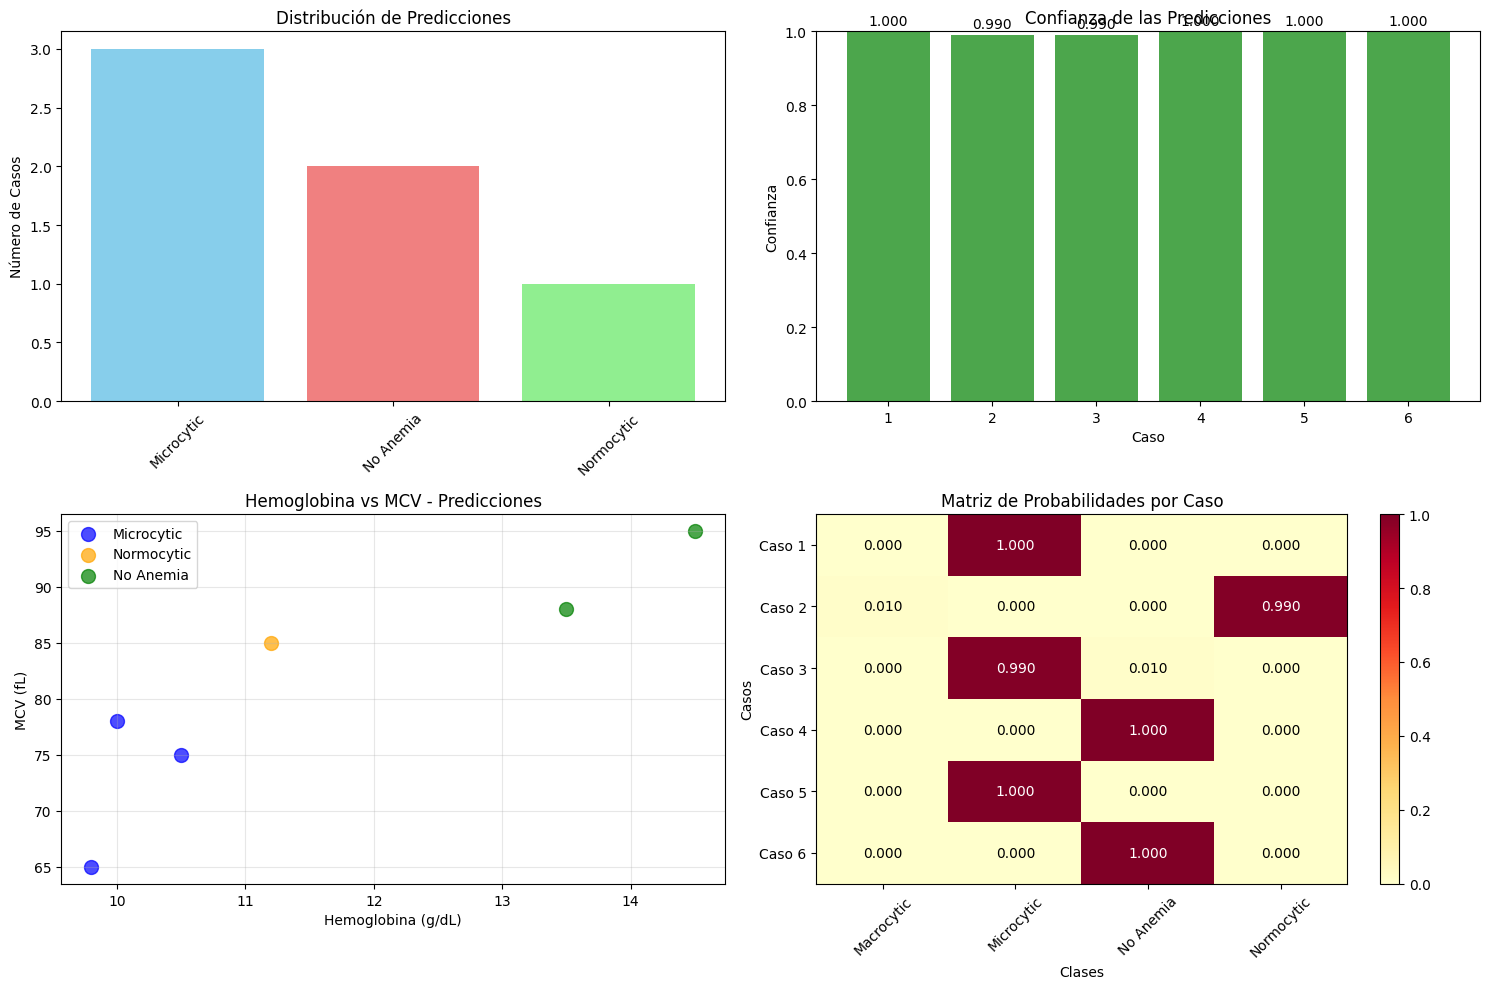

In [41]:
# Visualización de las predicciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución de predicciones
pred_counts = pd.Series(predicciones_texto).value_counts()
axes[0,0].bar(pred_counts.index, pred_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
axes[0,0].set_title('Distribución de Predicciones')
axes[0,0].set_ylabel('Número de Casos')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Confianza de las predicciones
confianzas = [np.max(prob) for prob in probabilidades]
axes[0,1].bar(range(1, len(confianzas)+1), confianzas, color='green', alpha=0.7)
axes[0,1].set_title('Confianza de las Predicciones')
axes[0,1].set_xlabel('Caso')
axes[0,1].set_ylabel('Confianza')
axes[0,1].set_ylim(0, 1)

# Añadir valores en las barras
for i, v in enumerate(confianzas):
    axes[0,1].text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 3. Hemoglobina vs MCV con predicciones
scatter_colors = {'Macrocytic': 'red', 'Microcytic': 'blue', 'No Anemia': 'green', 'Normocytic': 'orange'}
for i, pred in enumerate(predicciones_texto):
    axes[1,0].scatter(casos_prueba.iloc[i]['HEMOGLOBINA'], casos_prueba.iloc[i]['MCV'], 
                     c=scatter_colors.get(pred, 'gray'), s=100, alpha=0.7, 
                     label=pred if pred not in [axes[1,0].get_legend_handles_labels()[1][j] for j in range(len(axes[1,0].get_legend_handles_labels()[1]))] else "")

axes[1,0].set_xlabel('Hemoglobina (g/dL)')
axes[1,0].set_ylabel('MCV (fL)')
axes[1,0].set_title('Hemoglobina vs MCV - Predicciones')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Heatmap de probabilidades
prob_matrix = np.array(probabilidades)
im = axes[1,1].imshow(prob_matrix, cmap='YlOrRd', aspect='auto')
axes[1,1].set_title('Matriz de Probabilidades por Caso')
axes[1,1].set_xlabel('Clases')
axes[1,1].set_ylabel('Casos')
axes[1,1].set_xticks(range(len(le_target.classes_)))
axes[1,1].set_xticklabels(le_target.classes_, rotation=45)
axes[1,1].set_yticks(range(len(casos_prueba)))
axes[1,1].set_yticklabels([f'Caso {i+1}' for i in range(len(casos_prueba))])

# Añadir valores en el heatmap
for i in range(len(casos_prueba)):
    for j in range(len(le_target.classes_)):
        text = axes[1,1].text(j, i, f'{prob_matrix[i, j]:.3f}', 
                             ha="center", va="center", color="black" if prob_matrix[i, j] < 0.5 else "white")

plt.colorbar(im, ax=axes[1,1])
plt.tight_layout()
plt.show()

### 6.4. Función de Predicción Personalizada

In [42]:
def predecir_anemia(edad, sexo, hemoglobina, mch, mchc, mcv):
    """
    Función para predecir el tipo de anemia de un paciente
    
    Parámetros:
    - edad: Edad del paciente (años)
    - sexo: 'F' para Femenino, 'M' para Masculino
    - hemoglobina: Nivel de hemoglobina (g/dL)
    - mch: Mean Corpuscular Hemoglobin (pg)
    - mchc: Mean Corpuscular Hemoglobin Concentration (g/dL)
    - mcv: Mean Corpuscular Volume (fL)
    """
    
    # Convertir sexo a número
    sexo_num = 0 if sexo.upper() == 'F' else 1
    
    # Determinar si tiene anemia según criterios médicos
    if (sexo.upper() == 'F' and hemoglobina < 12) or (sexo.upper() == 'M' and hemoglobina < 13):
        anemia_flag = 1
    else:
        anemia_flag = 0
    
    # Crear array de datos
    datos_paciente = np.array([[edad, sexo_num, hemoglobina, mch, mchc, mcv, anemia_flag]])
    
    # Normalizar datos
    scaler = MinMaxScaler()
    scaler.fit(X)  # Usar el mismo escalador que en entrenamiento
    datos_normalizados = scaler.transform(datos_paciente)
    
    # Realizar predicción
    prediccion = modelo_final.predict(datos_normalizados)[0]
    probabilidades = modelo_final.predict_proba(datos_normalizados)[0]
    
    # Convertir a texto
    tipo_anemia = le_target.inverse_transform([prediccion])[0]
    confianza = np.max(probabilidades)
    
    # Imprimir resultados
    print("🏥" + "="*60)
    print("           RESULTADO DE PREDICCIÓN DE ANEMIA")
    print("="*63)
    print(f"👤 Paciente: {sexo.upper()}, {edad} años")
    print(f"🩸 Hemoglobina: {hemoglobina} g/dL")
    print(f"📊 MCH: {mch} pg | MCHC: {mchc} g/dL | MCV: {mcv} fL")
    print("-"*63)
    
    # Validación médica
    if sexo.upper() == 'F' and hemoglobina < 12:
        status = "✅ ANEMIA PRESENTE (Hb < 12 g/dL en mujeres)"
    elif sexo.upper() == 'M' and hemoglobina < 13:
        status = "✅ ANEMIA PRESENTE (Hb < 13 g/dL en hombres)"
    else:
        status = "❌ SIN ANEMIA según criterios médicos"
    
    print(f"🔬 Estado médico: {status}")
    print(f"🤖 Predicción del modelo: {tipo_anemia}")
    print(f"📈 Confianza: {confianza:.4f} ({confianza*100:.2f}%)")
    
    print("\n📊 Probabilidades por tipo:")
    for i, clase in enumerate(le_target.classes_):
        barra = "█" * int(probabilidades[i] * 20)  # Barra visual
        print(f"   {clase:15}: {probabilidades[i]:.4f} ({probabilidades[i]*100:.1f}%) {barra}")
    
    # Interpretación clínica
    print(f"\n🏥 INTERPRETACIÓN CLÍNICA:")
    if tipo_anemia == "No Anemia":
        print("   • Parámetros hematológicos dentro de rangos normales")
        print("   • No se detecta anemia")
    elif tipo_anemia == "Microcytic":
        print("   • Anemia microcítica detectada (MCV < 80 fL)")
        print("   • Posibles causas: deficiencia de hierro, talasemia")
        print("   • Recomendación: evaluar niveles de hierro y ferritina")
    elif tipo_anemia == "Normocytic":
        print("   • Anemia normocítica detectada (MCV 80-100 fL)")
        print("   • Posibles causas: enfermedades crónicas, insuficiencia renal")
        print("   • Recomendación: investigar causas subyacentes")
    elif tipo_anemia == "Macrocytic":
        print("   • Anemia macrocítica detectada (MCV > 100 fL)")
        print("   • Posibles causas: deficiencia de B12/folato, alcoholismo")
        print("   • Recomendación: evaluar niveles de vitamina B12 y folato")
    
    print("="*63)
    
    return tipo_anemia, confianza, probabilidades

# Ejemplo de uso de la función
print("🧪 EJEMPLO DE PREDICCIÓN PERSONALIZADA:")
print()

# Caso ejemplo: Mujer con posible anemia microcítica
resultado = predecir_anemia(
    edad=42, 
    sexo='F', 
    hemoglobina=9.5, 
    mch=24.2, 
    mchc=31.8, 
    mcv=72.0
)

🧪 EJEMPLO DE PREDICCIÓN PERSONALIZADA:

🏥============================================================
           RESULTADO DE PREDICCIÓN DE ANEMIA
👤 Paciente: F, 42 años
🩸 Hemoglobina: 9.5 g/dL
📊 MCH: 24.2 pg | MCHC: 31.8 g/dL | MCV: 72.0 fL
---------------------------------------------------------------
🔬 Estado médico: ✅ ANEMIA PRESENTE (Hb < 12 g/dL en mujeres)
🤖 Predicción del modelo: Microcytic
📈 Confianza: 1.0000 (100.00%)

📊 Probabilidades por tipo:
   Macrocytic     : 0.0000 (0.0%) 
   Microcytic     : 1.0000 (100.0%) ████████████████████
   No Anemia      : 0.0000 (0.0%) 
   Normocytic     : 0.0000 (0.0%) 

🏥 INTERPRETACIÓN CLÍNICA:
   • Anemia microcítica detectada (MCV < 80 fL)
   • Posibles causas: deficiencia de hierro, talasemia
   • Recomendación: evaluar niveles de hierro y ferritina
